## Como colocar las camaras
En tu puerto debes colocar las camaras para que la camara donde salga todo mas borroso sea el webcam_1 y la otra el webcam_2.

En el webcam_1 veras las caras siguientes: 
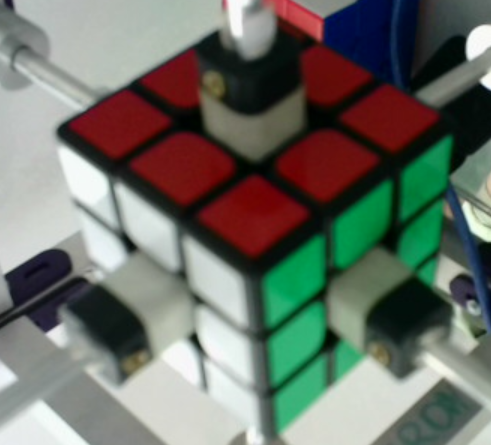

En el webcam_2 veras las caras siguientes:
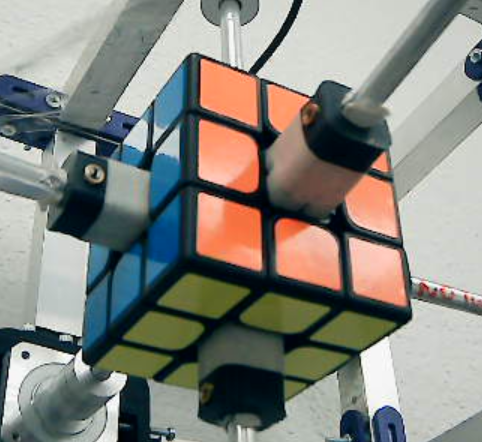

¿Cómo debes elegir los colores? 

In [ ]:
"""
colors:
                0 0 0
                0 0 0
                0 0 0
            2 2 2 5 5 5 3 3 3 4 4 4
            2 2 2 5 5 5 3 3 3 4 4 4
            2 2 2 5 5 5 3 3 3 4 4 4
                1 1 1
                1 1 1
                1 1 1
        order of stickers on each face:
             2  5  8
             1  4  7
            [0] 3  6
                            Los colores son:
                                0: BLANCO
                                1: AMARILLO
                                2: VERDE
                                3: AZUL
                                4: NARANJA
                                5: ROJO

                                
indices of state (each starting with 9*(n-1)):
                   2   5   8
                   1   4   7
                  [0]  3   6
        20  23 26  47  50  53  29  32 35  38  41 44
        19  22 25  46  49  52  28  31 34  37  40 43
       [18] 21 24 [45] 48  51 [27] 30 33 [36] 39 42
                   11  14  17
                   10  13  16
                   [9] 12  15
"""

## EL ORDEN QUE DEBES SEGIR 

WEBCAM_1
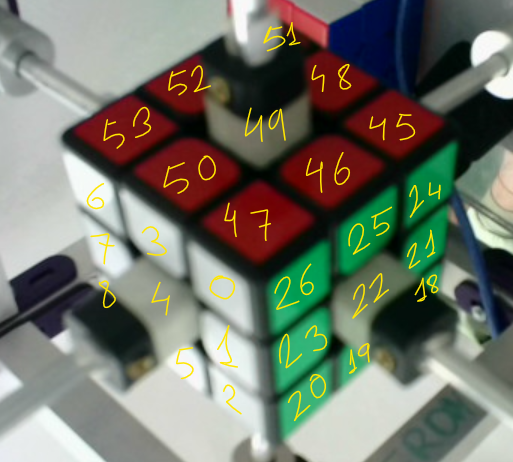

WEBCAM_2
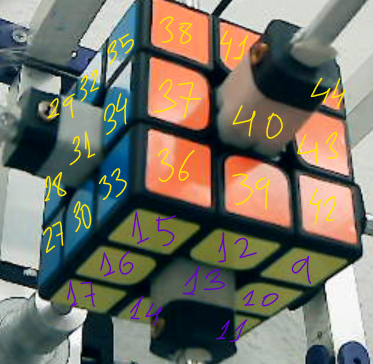

### SIGUE EL ORDEN DE LAS CARAS DA IGUAL SI EMPIZAS POR LA PRIMERA IMAGEN O LA SEGUNDA SIGUE EL ORDEN


In [1]:
import cv2
import numpy as np

# Create a window to display the video feed
cv2.namedWindow('Webcam_1')
cv2.setMouseCallback('Webcam_1', lambda event, x, y, flags, param: onMouse1(event, x, y, flags, param))

cv2.namedWindow('Webcam_2')
cv2.setMouseCallback('Webcam_2', lambda event, x, y, flags, param: onMouse2(event, x, y, flags, param))

# Initialize the polygon vertices list and current polygon list
polygons_1 = []
polygons_2 = []
current_polygon_1 = []
current_polygon_2 = []

def onMouse1(event, x, y, flags, param):
    global current_polygon_1

    if event == cv2.EVENT_LBUTTONDOWN:
        current_polygon_1.append((x,y))

    elif event == cv2.EVENT_RBUTTONDOWN:
        if len(current_polygon_1) > 2:
            polygons_1.append(current_polygon_1)
            current_polygon_1 = []

def onMouse2(event, x, y, flags, param):
    global current_polygon_2

    if event == cv2.EVENT_LBUTTONDOWN:
        current_polygon_2.append((x,y))

    elif event == cv2.EVENT_RBUTTONDOWN:
        if len(current_polygon_2) > 2:
            polygons_2.append(current_polygon_2)
            current_polygon_2 = []

# Initialize the webcam capture object
cap_1 = cv2.VideoCapture(0)
cap_2 = cv2.VideoCapture(1)

# Start capturing webcam input
while True:
    ret_1, frame_1 = cap_1.read()
    ret_2, frame_2 = cap_2.read()

    # Draw all polygons on top of the video feed
    for polygon in polygons_1:
        pts_1 = np.array(polygon, np.int32)
        pts_1 = pts_1.reshape((-1,1,2))
        cv2.polylines(frame_1, [pts_1], True, (0,255,0))

    for polygon in polygons_2:
        pts_2 = np.array(polygon, np.int32)
        pts_2 = pts_2.reshape((-1,1,2))
        cv2.polylines(frame_2, [pts_2], True, (0,255,0))


    # Draw the current polygon on top of the video feed
    if len(current_polygon_1) > 0:
        pts_1 = np.array(current_polygon_1, np.int32)
        pts_1 = pts_1.reshape((-1,1,2))
        cv2.polylines(frame_1, [pts_1], True, (0,0,255))

    if len(current_polygon_2) > 0:
        pts_2 = np.array(current_polygon_2, np.int32)
        pts_2 = pts_2.reshape((-1,1,2))
        cv2.polylines(frame_2, [pts_2], True, (0,0,255))

    # Display the video feed for each camera
    cv2.imshow('Webcam_1', frame_1)
    cv2.imshow('Webcam_2', frame_2)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
cap_1.release()
cap_2.release()

# Calculate the average HSV values of the pixels within each polygon
avg_hsv_array_1 = np.zeros((24, 3))  # Un array de 24 filas y 3 columnas para los valores HSV

hsv_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2HSV)
for i, polygon in enumerate(polygons_1):
    pts = np.array(polygon, np.int32)
    pts = pts.reshape((-1,1,2))
    mask = np.zeros_like(frame_1[:,:,0])
    cv2.fillPoly(mask, [pts], 255)

    # Create a mask where the lines are black
    line_mask = np.zeros_like(frame_1[:,:,0])
    cv2.polylines(line_mask,[pts],True,(255,255,255))

    # Combine the polygon mask and line mask to create a new mask
    mask = cv2.bitwise_xor(mask, line_mask)

    # Calculate the average HSV values using the new mask
    avg_hsv = cv2.mean(hsv_1, mask=mask)
    
    # Guardar los valores de avg_hsv en el array
    avg_hsv_array_1[i] = avg_hsv[:3]  # Tomamos solo los primeros tres elementos (H, S, V)

    print(f"Polygon webcam_1 {i}: {avg_hsv}")
    #avg_hsv_array_1 donde se guardan las variables hsv

avg_hsv_array_2 = np.zeros((24, 3))  # Un array de 24 filas y 3 columnas para los valores HSV

hsv_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2HSV)
for i, polygon in enumerate(polygons_2):
    pts = np.array(polygon, np.int32)
    pts = pts.reshape((-1,1,2))
    mask = np.zeros_like(frame_2[:,:,0])
    cv2.fillPoly(mask, [pts], 255)

    # Create a mask where the lines are black
    line_mask = np.zeros_like(frame_2[:,:,0])
    cv2.polylines(line_mask,[pts],True,(255,255,255))

    # Combine the polygon mask and line mask to create a new mask
    mask = cv2.bitwise_xor(mask, line_mask)

    # Calculate the average HSV values using the new mask
    avg_hsv = cv2.mean(hsv_2, mask=mask)
    
    # Guardar los valores de avg_hsv en el array
    avg_hsv_array_2[i] = avg_hsv[:3]  # Tomamos solo los primeros tres elementos (H, S, V)

    print(f"Polygon webcam_2 {i}: {avg_hsv}")
# Close all windows
cv2.destroyAllWindows()

Polygon webcam_1 0: (23.125, 0.3472222222222222, 206.76388888888889, 0.0)
Polygon webcam_1 1: (128.48275862068965, 2.2413793103448274, 232.72413793103448, 0.0)
Polygon webcam_1 2: (11.25, 0.5416666666666666, 226.54166666666666, 0.0)
Polygon webcam_1 3: (99.0, 1.676923076923077, 247.6769230769231, 0.0)
Polygon webcam_1 4: (7.415730337078651, 0.0898876404494382, 214.57303370786516, 0.0)
Polygon webcam_1 5: (88.65957446808511, 1.9574468085106382, 246.3404255319149, 0.0)
Polygon webcam_1 6: (113.01666666666667, 52.46666666666667, 239.68333333333334, 0.0)
Polygon webcam_1 7: (113.275, 51.175000000000004, 240.20000000000002, 0.0)
Polygon webcam_1 8: (75.62857142857142, 254.9142857142857, 150.4857142857143, 0.0)
Polygon webcam_1 9: (75.76388888888889, 255.0, 146.90277777777777, 0.0)
Polygon webcam_1 10: (75.25675675675676, 246.10810810810813, 146.82432432432432, 0.0)
Polygon webcam_1 11: (74.08695652173913, 255.0, 132.02898550724638, 0.0)
Polygon webcam_1 12: (74.0, 215.93333333333334, 147.4,

In [2]:
import numpy as np

# Seleccionar los elementos específicos de cada array
parte_1 = avg_hsv_array_1[:5]  # Los primeros 6 elementos del primer array
parte_2 = avg_hsv_array_2[:5]  # Los primeros 6 elementos del segundo array
parte_3 = avg_hsv_array_1[5:10]  # Los siguientes 6 elementos del primer array
parte_4 = avg_hsv_array_2[5:15]  # Los siguientes 12 elementos del segundo array
parte_5 = avg_hsv_array_1[10:]  # Los últimos 6 elementos del primer array

# Concatenar las partes para formar el array final
array_final_color = np.concatenate((parte_1, parte_2, parte_3, parte_4, parte_5))

print(array_final_color)

[[2.31250000e+01 3.47222222e-01 2.06763889e+02]
 [1.28482759e+02 2.24137931e+00 2.32724138e+02]
 [1.12500000e+01 5.41666667e-01 2.26541667e+02]
 [9.90000000e+01 1.67692308e+00 2.47676923e+02]
 [7.41573034e+00 8.98876404e-02 2.14573034e+02]
 [3.11914894e+01 1.28021277e+02 1.33638298e+02]
 [3.79642857e+01 1.47821429e+02 1.54250000e+02]
 [3.80869565e+01 1.48478261e+02 1.54391304e+02]
 [3.03384615e+01 1.38169231e+02 1.26692308e+02]
 [3.16363636e+01 1.39363636e+02 1.20363636e+02]
 [8.86595745e+01 1.95744681e+00 2.46340426e+02]
 [1.13016667e+02 5.24666667e+01 2.39683333e+02]
 [1.13275000e+02 5.11750000e+01 2.40200000e+02]
 [7.56285714e+01 2.54914286e+02 1.50485714e+02]
 [7.57638889e+01 2.55000000e+02 1.46902778e+02]
 [3.10000000e+01 1.48000000e+02 1.24029412e+02]
 [3.10000000e+01 1.35000000e+02 1.23250000e+02]
 [3.19230769e+01 1.21442308e+02 1.23711538e+02]
 [7.94285714e+00 1.87171429e+02 2.46942857e+02]
 [8.64516129e+00 1.46634409e+02 2.54795699e+02]
 [9.23076923e+00 1.52384615e+02 2.549230

In [3]:
import numpy as np
import cv2

color_array = np.full((54,), "Desconocido", dtype=object)

color_array[4] = 'blanco'
color_array[22] = 'verde'
color_array[44] = 'rojo'
color_array[31] = 'azul'
color_array[40] = 'naranja'
color_array[13] = 'amarrillo'

def get_limits(hsvC):
    hue = hsvC[0][0][0]  # Get the hue value

    # Handle red hue wrap-around
    if hue >= 165:  # Upper limit for divided red hue
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([180, 255, 255], dtype=np.uint8)
    elif hue <= 15:  # Lower limit for divided red hue
        lowerLimit = np.array([0, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)
    else:
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)

    return lowerLimit, upperLimit

def determinar_color(hsvC):
    # Convertir los valores de hsvC de [0, 360] a [0, 180] para la matiz
    hsvC[:, :, 0] = hsvC[:, :, 0] / 2
    #hsvC = hsvC.astype(np.uint8)

    lowerLimit, upperLimit = get_limits(hsvC)
    color = "Desconocido"

    # Definir los rangos de color en HSV
    colores = {
        'naranja': (np.array([10, 100, 100]), np.array([20, 255, 255])),
        'amarillo': (np.array([20, 100, 100]), np.array([30, 255, 255])),
        'verde': (np.array([30, 100, 100]), np.array([60, 255, 255])),
        'azul': (np.array([90, 100, 100]), np.array([120, 255, 255])),
        'blanco': (np.array([0, 0, 150]), np.array([180, 50, 255])),
        'rojo': (lowerLimit, upperLimit)
    }

    for nombre_color, (limite_inferior, limite_superior) in colores.items():
        if cv2.inRange(hsvC, limite_inferior, limite_superior).any():
            # print(hsvC)
            color = nombre_color
            break

    return color

# Ejemplo de uso
if __name__ == "__main__":
    # Simular un valor de hsvC
    i = 0
    for valor in array_final_color:
        #print(hsvC)
        hsvC = np.array([[valor]], dtype=np.float32)  # Convertir a matriz de numpy
        # Determinar el color predominante
        color_predominante = determinar_color(hsvC)
        if (color_array[i] == 'Desconocido'):
            color_array[i] = color_predominante
        print("color:",i, color_array[i])
        i = i + 1 
    

color: 0 blanco
color: 1 blanco
color: 2 blanco
color: 3 blanco
color: 4 blanco
color: 5 naranja
color: 6 naranja
color: 7 naranja
color: 8 naranja
color: 9 naranja
color: 10 blanco
color: 11 Desconocido
color: 12 Desconocido
color: 13 amarrillo
color: 14 verde
color: 15 naranja
color: 16 naranja
color: 17 naranja
color: 18 rojo
color: 19 rojo
color: 20 rojo
color: 21 rojo
color: 22 verde
color: 23 Desconocido
color: 24 rojo
color: 25 verde
color: 26 verde
color: 27 verde
color: 28 verde
color: 29 verde
color: 30 verde
color: 31 azul
color: 32 rojo
color: 33 verde
color: 34 rojo
color: 35 rojo
color: 36 rojo
color: 37 Desconocido
color: 38 amarillo


# HAY PROBLEMAS EN LA ASIGNACIÓN DE VARIABLES PARA INCLUIR LOS VALORES DETERMINADOS

In [4]:
import numpy as np

# Supongamos que tienes un array de ejemplo
array_colores = np.array(color_array)

# Crear un nuevo array para almacenar los valores correspondientes
array_codificado = np.zeros_like(array_colores, dtype=int)

# Recorrer el array de colores y asignar los valores correspondientes en el array codificado
for i, color in enumerate(array_colores):
    if color == 'blanco':
        array_codificado[i] = 0
    elif color == 'amarillo':
        array_codificado[i] = 1
    elif color == 'verde':
        array_codificado[i] = 2
    elif color == 'azul':
        array_codificado[i] = 3
    elif color == 'naranja':
        array_codificado[i] = 4
    elif color == 'rojo':
        array_codificado[i] = 5
    elif color == 'Desconocido':
        array_codificado[i] = 9

print("Array codificado:", array_codificado)

#array_final

Array codificado: [0 0 0 0 0 4 4 4 4 4 0 9 9 0 2 4 4 4 5 5 5 5 2 9 5 2 2 2 2 2 2 3 5 2 5 5 5
 9 1 9 4 9 9 9 5 9 9 9 9 9 9 9 9 9]
